In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix,classification_report,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,CategoricalNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [154]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [155]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [156]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
Rainfall          1406
RainToday         1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
Date                 0
RISK_MM              0
RainTomorrow         0
dtype: int64

In [157]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [158]:
df.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am','Date'], axis=1, inplace=True)

In [159]:
cols_nan = df.columns[df.isnull().any()]
cols_nan

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [160]:
df.shape

(142193, 19)

In [161]:
for col in cols_nan:
    df = df[~((df['RainTomorrow'] == 'No') & (df[col].isnull()))]

In [162]:
df.shape

(119783, 19)

In [163]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     87906
Yes    31877
Name: count, dtype: int64

In [164]:
df.isnull().sum().sort_values(ascending=False)

Pressure3pm      3113
Pressure9am      3103
WindGustDir      2467
WindGustSpeed    2442
WindDir9am       1921
WindDir3pm       1053
Humidity3pm       964
Temp3pm           742
WindSpeed3pm      683
Rainfall          676
RainToday         676
Humidity9am       534
WindSpeed9am      340
Temp9am           298
MinTemp           175
MaxTemp            55
Location            0
RISK_MM             0
RainTomorrow        0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119783 entries, 0 to 142192
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       119783 non-null  object 
 1   MinTemp        119608 non-null  float64
 2   MaxTemp        119728 non-null  float64
 3   Rainfall       119107 non-null  float64
 4   WindGustDir    117316 non-null  object 
 5   WindGustSpeed  117341 non-null  float64
 6   WindDir9am     117862 non-null  object 
 7   WindDir3pm     118730 non-null  object 
 8   WindSpeed9am   119443 non-null  float64
 9   WindSpeed3pm   119100 non-null  float64
 10  Humidity9am    119249 non-null  float64
 11  Humidity3pm    118819 non-null  float64
 12  Pressure9am    116680 non-null  float64
 13  Pressure3pm    116670 non-null  float64
 14  Temp9am        119485 non-null  float64
 15  Temp3pm        119041 non-null  float64
 16  RainToday      119107 non-null  object 
 17  RISK_MM        119783 non-null  fl

In [166]:
df['Pressure3pm'].skew()

np.float64(-0.05520358511298448)

In [167]:
df['Pressure9am'].skew()

np.float64(-0.10756669232283464)

In [168]:
df['WindGustSpeed'].skew()

np.float64(0.912444018373156)

In [169]:
df['Humidity3pm'].skew()

np.float64(0.024171057544919262)

In [170]:
df['Temp3pm'].skew()

np.float64(0.2770151622965389)

In [171]:
df['WindSpeed3pm'].skew()

np.float64(0.6515731244683776)

In [172]:
df['Rainfall'].skew()

np.float64(9.479117589093672)

In [173]:
df['Humidity9am'].skew()

np.float64(-0.4785778750643886)

In [174]:
df['WindSpeed9am'].skew()

np.float64(0.8731433805418296)

In [175]:
df['Temp9am'].skew()

np.float64(0.14755959897403506)

In [176]:
df['MinTemp'].skew()

np.float64(0.06004715239508101)

In [177]:
df['MaxTemp'].skew()

np.float64(0.2538259378487904)

In [178]:
mean_cols =['Pressure3pm','Pressure9am','Humidity3pm','Temp3pm','Humidity9am','Temp9am','MinTemp','MaxTemp']
median_cols=['WindSpeed9am','Rainfall','WindSpeed3pm','WindGustSpeed']
freq_cols =['WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [179]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in mean_cols:
    df[[col]] = imputer_mean.fit_transform(df[[col]])


imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
for col in median_cols:
    df[[col]] = imputer_median.fit_transform(df[[col]])


imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for col in freq_cols:
    df[[col]] = imputer_freq.fit_transform(df[[col]])

In [180]:
df.isnull().sum().sum()

np.int64(0)

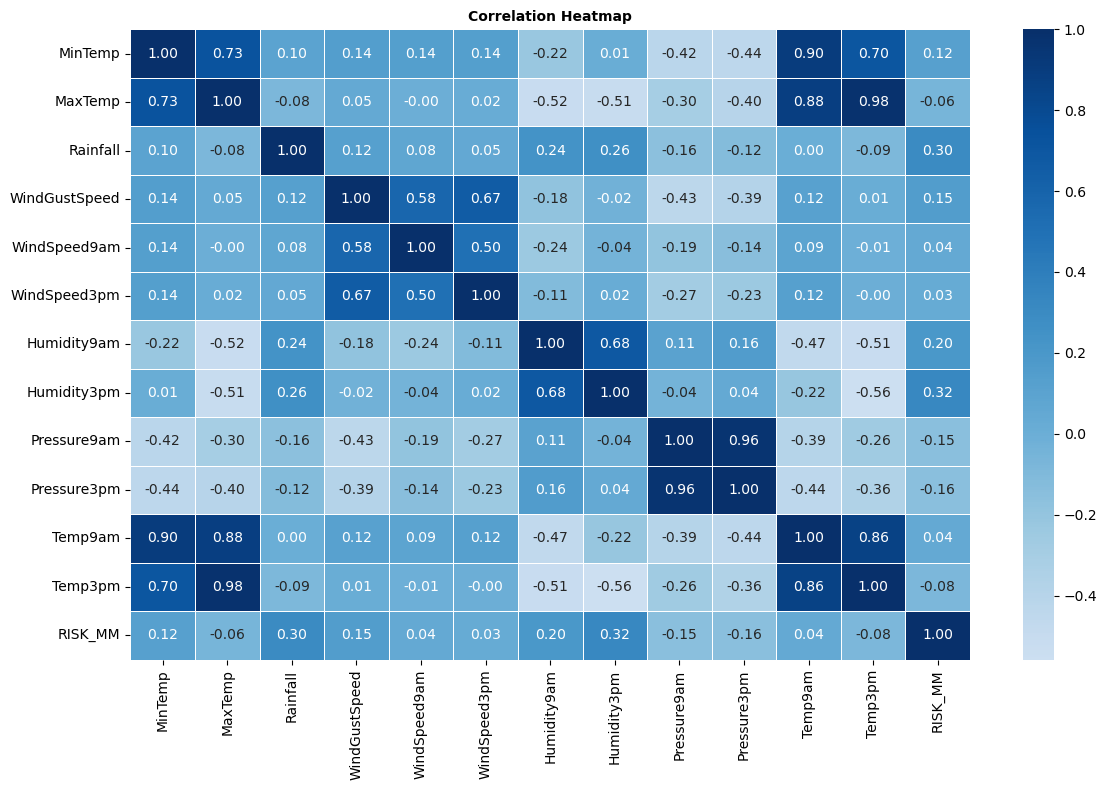

In [181]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)

sns.heatmap( corr,annot=True,fmt=".2f", cmap='Blues',center=0,linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=10, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [182]:
df.drop(['Pressure9am','Location','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [202]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,13,44.0,20.0,24.0,71.0,22.0,1007.1,16.9,21.8,0,0.0,0
1,7.4,25.1,0.0,14,44.0,4.0,22.0,44.0,25.0,1007.8,17.2,24.3,0,0.0,0
2,12.9,25.7,0.0,15,46.0,19.0,26.0,38.0,30.0,1008.7,21.0,23.2,0,0.0,0
3,9.2,28.0,0.0,4,24.0,11.0,9.0,45.0,16.0,1012.8,18.1,26.5,0,1.0,0
4,17.5,32.3,1.0,13,41.0,7.0,20.0,82.0,33.0,1006.0,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,0,31.0,15.0,13.0,59.0,27.0,1021.2,9.4,20.9,0,0.0,0
142189,2.8,23.4,0.0,0,31.0,13.0,11.0,51.0,24.0,1020.3,10.1,22.4,0,0.0,0
142190,3.6,25.3,0.0,6,22.0,13.0,9.0,56.0,21.0,1019.1,10.9,24.5,0,0.0,0
142191,5.4,26.9,0.0,3,37.0,9.0,9.0,53.0,24.0,1016.8,12.5,26.1,0,0.0,0


In [184]:
df.select_dtypes(include='object').columns

Index(['WindGustDir', 'RainToday', 'RainTomorrow'], dtype='object')

In [185]:
import pickle

for col in df.select_dtypes(include='object').columns:
  le=LabelEncoder()
  df[col] = le.fit_transform(df[col]).ravel()

  with open(f'{col}_label_encoder.pkl','wb') as f:
    pickle.dump(le,f)

In [186]:
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,13,44.0,20.0,24.0,71.0,22.0,1007.1,16.9,21.8,0,0.0,0
1,7.4,25.1,0.0,14,44.0,4.0,22.0,44.0,25.0,1007.8,17.2,24.3,0,0.0,0
2,12.9,25.7,0.0,15,46.0,19.0,26.0,38.0,30.0,1008.7,21.0,23.2,0,0.0,0
3,9.2,28.0,0.0,4,24.0,11.0,9.0,45.0,16.0,1012.8,18.1,26.5,0,1.0,0
4,17.5,32.3,1.0,13,41.0,7.0,20.0,82.0,33.0,1006.0,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,0,31.0,15.0,13.0,59.0,27.0,1021.2,9.4,20.9,0,0.0,0
142189,2.8,23.4,0.0,0,31.0,13.0,11.0,51.0,24.0,1020.3,10.1,22.4,0,0.0,0
142190,3.6,25.3,0.0,6,22.0,13.0,9.0,56.0,21.0,1019.1,10.9,24.5,0,0.0,0
142191,5.4,26.9,0.0,3,37.0,9.0,9.0,53.0,24.0,1016.8,12.5,26.1,0,0.0,0


In [187]:
df.duplicated().sum()

np.int64(0)

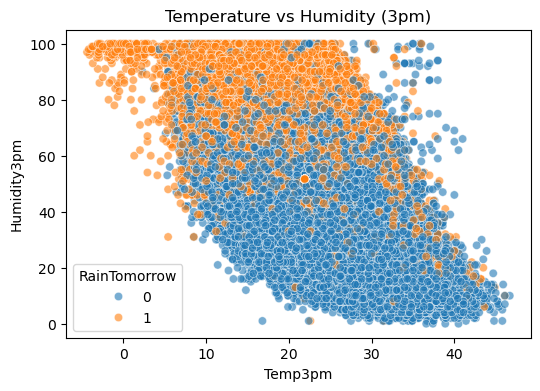

In [188]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Temp3pm', y='Humidity3pm', hue='RainTomorrow', data=df, alpha=0.6)
plt.title('Temperature vs Humidity (3pm)')
plt.show()

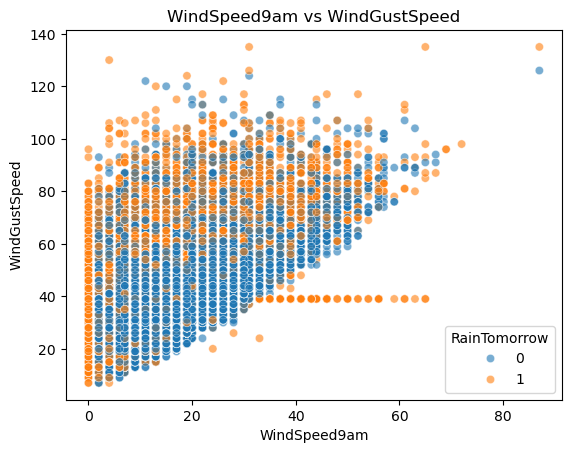

In [189]:
sns.scatterplot(x='WindSpeed9am', y='WindGustSpeed', hue='RainTomorrow', data=df, alpha=0.6)
plt.title('WindSpeed9am vs WindGustSpeed')
plt.show()

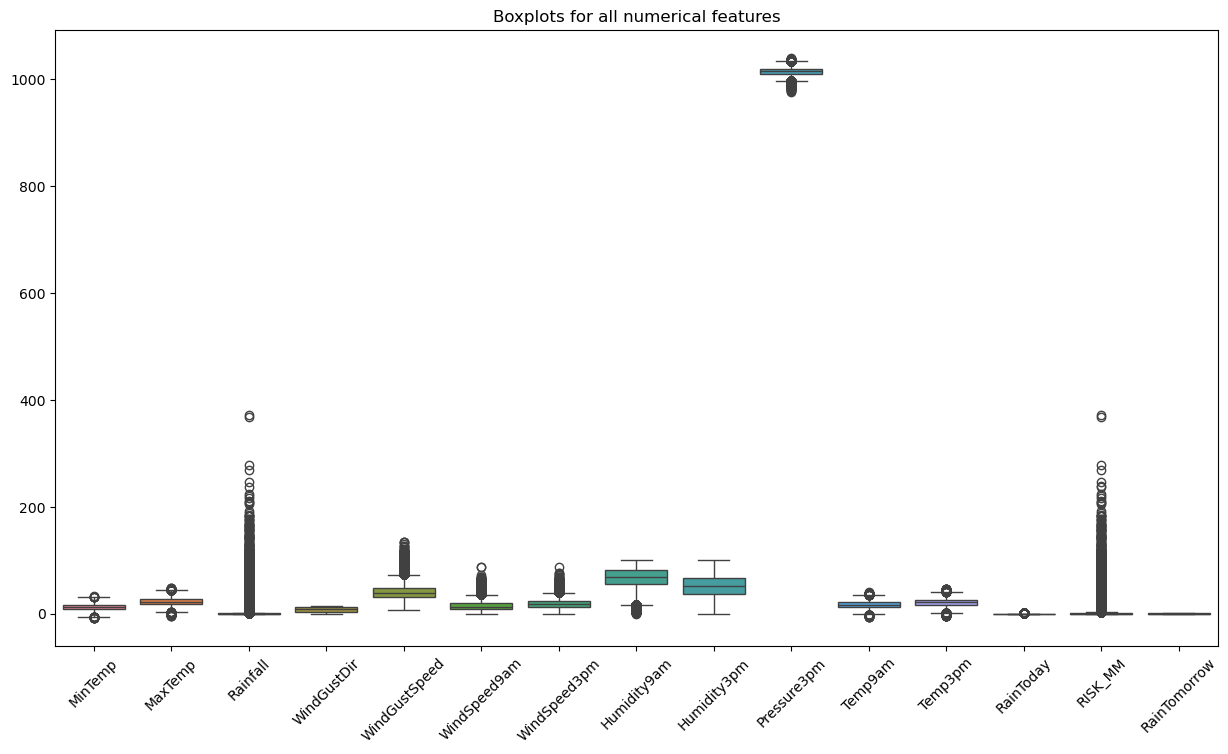

In [190]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots for all numerical features")
plt.show()

In [191]:
df.shape

(119783, 15)

In [192]:
df.dropna(axis=0,inplace=True)

In [193]:
df.shape

(119783, 15)

In [194]:
X=df.drop(['RainTomorrow'],axis=1)

In [195]:
Y=df['RainTomorrow']

In [196]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=42,shuffle=True)
print("X_train = ",X_train.shape ," y_train = ", Y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", Y_test.shape)

X_train =  (95826, 14)  y_train =  (95826,)
X_test  =  (23957, 14)  y_test  =  (23957,)


In [197]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [198]:
with open('scaler.pkl','wb') as f:
  pickle.dump(scaler,f)

In [199]:
models={
    #'LogisticRegression':LogisticRegression(class_weight='balanced'),
    #'KNN':KNeighborsClassifier(n_neighbors=5,p=1,metric='minkowski'),
    #"GaussianNB":GaussianNB(),
    #"BernoulliNB":BernoulliNB(),
    #"DecisionTree":DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(),
    #"SVM":SVC(kernel='linear', C=100, gamma=1,probability=True,class_weight='balanced')
}

*********************************** Using RandomForest **********************************************
************************************* Confustion Matrix **********************************************
[[17588     0]
 [    0  6369]]


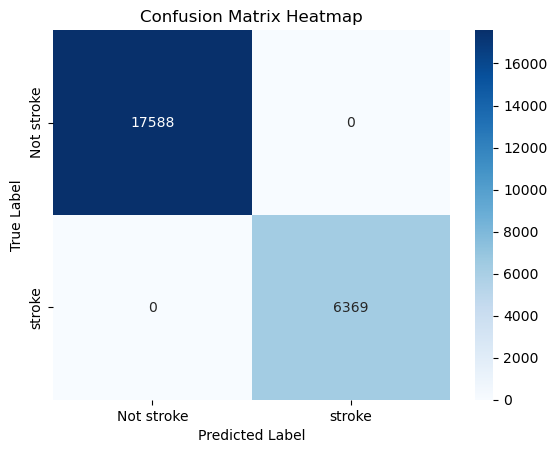

********************************* Classification Report For Train **************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70318
           1       1.00      1.00      1.00     25508

    accuracy                           1.00     95826
   macro avg       1.00      1.00      1.00     95826
weighted avg       1.00      1.00      1.00     95826

********************************* Classification Report For Test ***************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17588
           1       1.00      1.00      1.00      6369

    accuracy                           1.00     23957
   macro avg       1.00      1.00      1.00     23957
weighted avg       1.00      1.00      1.00     23957



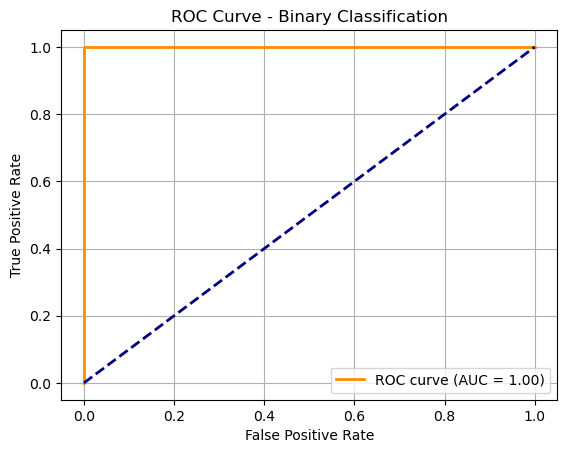

In [200]:
accuracy=[]
for model_name,model in models.items():
  model.fit(X_train,Y_train)

  Y_pred_train = model.predict(X_train)
  Y_pred_test = model.predict(X_test)

  Acc_Train = accuracy_score(Y_train,Y_pred_train)
  Acc_Test  =  accuracy_score(Y_test,Y_pred_test)


  Pre_Train = precision_score(Y_train,Y_pred_train,average='binary')
  Pre_Test  =  precision_score(Y_test,Y_pred_test,average='binary')

  Rec_Train = recall_score(Y_train,Y_pred_train,average='binary')
  Rec_Test  =  recall_score(Y_test,Y_pred_test,average='binary')

  F1_Train = f1_score(Y_train,Y_pred_train,average='binary')
  F1_Test  =  f1_score(Y_test,Y_pred_test,average='binary')

  accuracy.append([Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test])

  print(f'*********************************** Using {model_name} **********************************************')

  class_name=['Not stroke','stroke']
  cm=confusion_matrix(Y_test,Y_pred_test)
  print('************************************* Confustion Matrix **********************************************')
  print(cm)
  sns.heatmap(cm,annot=True, xticklabels=class_name, yticklabels=class_name,cmap='Blues',fmt='d')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix Heatmap')
  plt.show()
  print("********************************* Classification Report For Train **************************************")
  print(classification_report(Y_train,Y_pred_train))
  print("********************************* Classification Report For Test ***************************************")
  print(classification_report(Y_test,Y_pred_test))

  y_probs=model.predict_proba(X_test)[:,1]
  #  Compute ROC curve and AUC
  fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
  roc_auc = auc(fpr, tpr)

  #  Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve - Binary Classification')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

  # pickle
  with open(f'{model_name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)


In [201]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train",
                               "Acc_Test","Pre_Test","Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,Pre_Test,Rec_Test,F1_Test
RandomForest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
